<a href="https://colab.research.google.com/github/KhmAsif/IMSE441/blob/main/Midterm1_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
#basic
import pandas as pd
import numpy as np

#statistic 
import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt

In [155]:
#import dataset
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/Coffee.csv"
df = pd.read_csv(url)
df.head()

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
0,719,40909,Central,Major Market,Amaretto,Beans,Coffee,Colorado,Regular,90,130,100,220,89,777,130,24,94,219,36
1,970,40909,Central,Major Market,Colombian,Beans,Coffee,Colorado,Regular,80,110,80,190,83,623,107,27,68,190,39
2,970,40909,Central,Major Market,Decaf Irish Cream,Beans,Coffee,Colorado,Decaf,100,140,110,240,95,821,139,26,101,234,38
3,303,40909,Central,Major Market,Green Tea,Leaves,Tea,Colorado,Regular,30,50,30,80,44,623,56,14,30,100,26
4,303,40909,Central,Major Market,Caffe Mocha,Beans,Espresso,Colorado,Regular,60,90,70,150,54,456,80,15,54,134,26


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area Code       4248 non-null   int64 
 1   Date            4248 non-null   int64 
 2   Market          4248 non-null   object
 3   Market Size     4248 non-null   object
 4   Product         4248 non-null   object
 5   Product Line    4248 non-null   object
 6   Product Type    4248 non-null   object
 7   State           4248 non-null   object
 8   Type            4248 non-null   object
 9   Budget COGS     4248 non-null   int64 
 10  Budget Margin   4248 non-null   int64 
 11  Budget Profit   4248 non-null   int64 
 12  Budget Sales    4248 non-null   int64 
 13  COGS            4248 non-null   int64 
 14  Inventory       4248 non-null   int64 
 15  Margin          4248 non-null   int64 
 16  Marketing       4248 non-null   int64 
 17  Profit          4248 non-null   int64 
 18  Sales   

In [157]:
df.isnull().sum() 

Area Code         0
Date              0
Market            0
Market Size       0
Product           0
Product Line      0
Product Type      0
State             0
Type              0
Budget COGS       0
Budget Margin     0
Budget Profit     0
Budget Sales      0
COGS              0
Inventory         0
Margin            0
Marketing         0
Profit            0
Sales             0
Total Expenses    0
dtype: int64

In [158]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area Code       4248 non-null   int64 
 1   Date            4248 non-null   int64 
 2   Market          4248 non-null   object
 3   Market Size     4248 non-null   object
 4   Product         4248 non-null   object
 5   Product Line    4248 non-null   object
 6   Product Type    4248 non-null   object
 7   State           4248 non-null   object
 8   Type            4248 non-null   object
 9   Budget COGS     4248 non-null   int64 
 10  Budget Margin   4248 non-null   int64 
 11  Budget Profit   4248 non-null   int64 
 12  Budget Sales    4248 non-null   int64 
 13  COGS            4248 non-null   int64 
 14  Inventory       4248 non-null   int64 
 15  Margin          4248 non-null   int64 
 16  Marketing       4248 non-null   int64 
 17  Profit          4248 non-null   int64 
 18  Sales   

In [159]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['AreaCode', 'Date', 'Market', 'MarketSize', 'Product', 'ProductLine',
       'ProductType', 'State', 'Type', 'BudgetCOGS', 'BudgetMargin',
       'BudgetProfit', 'BudgetSales', 'COGS', 'Inventory', 'Margin',
       'Marketing', 'Profit', 'Sales', 'TotalExpenses'],
      dtype='object')

In [161]:
df.columns = df.columns.str.lower()
df.columns

Index(['areacode', 'date', 'market', 'marketsize', 'product', 'productline',
       'producttype', 'state', 'type', 'budgetcogs', 'budgetmargin',
       'budgetprofit', 'budgetsales', 'cogs', 'inventory', 'margin',
       'marketing', 'profit', 'sales', 'totalexpenses'],
      dtype='object')

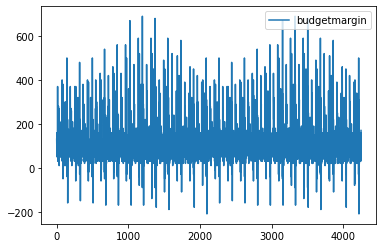

In [162]:
df['budgetmargin'].plot();

plt.legend(loc='upper right');  #default chart type is line

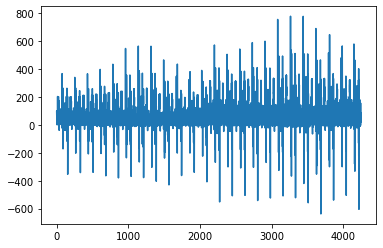

In [163]:
df['profit'].plot();

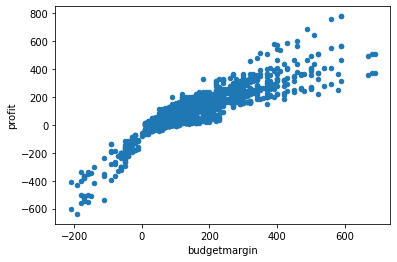

In [164]:
df.plot.scatter(x='budgetmargin', y='profit');    # you're studying the relationship between two variables, then use scatter plot

<AxesSubplot:xlabel='budgetmargin', ylabel='profit'>

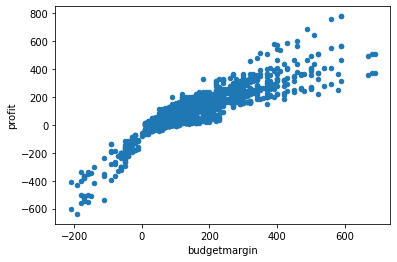

In [165]:
df.plot(kind = 'scatter',x='budgetmargin', y='profit')

In [166]:
g = df.groupby('product')['profit','sales'].mean()
g

<ipython-input-166-db6a49c2990e>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,profit,sales
product,,
Amaretto,25.468750,136.817708
Caffe Latte,52.662037,166.199074
Caffe Mocha,36.829167,176.883333
Chamomile,70.914062,196.817708
Colombian,116.258333,267.314583
Darjeeling,75.658854,190.497396
Decaf Espresso,72.308824,191.573529
Decaf Irish Cream,36.429688,162.104167
Earl Grey,83.902778,231.847222


<AxesSubplot:xlabel='product'>

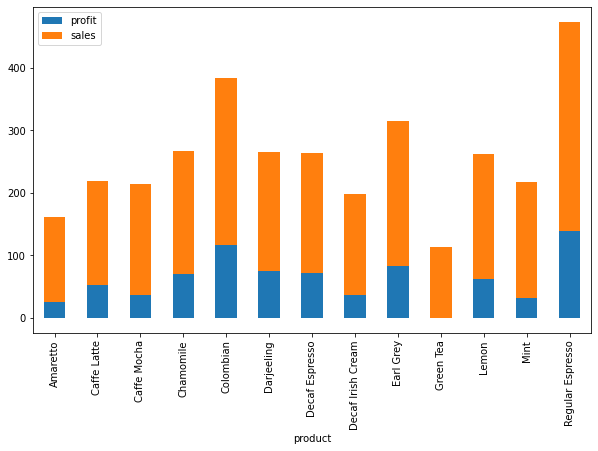

In [168]:
g.plot(kind = 'bar', figsize = (10,6), stacked = True )

<AxesSubplot:ylabel='Frequency'>

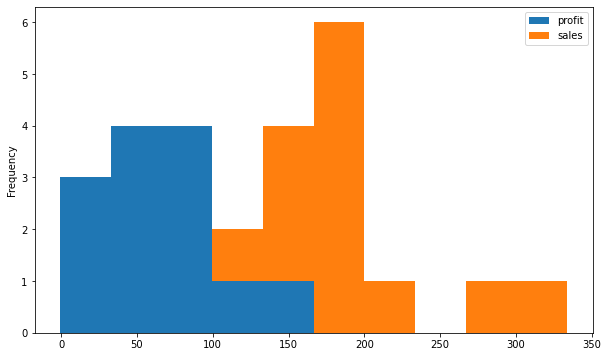

In [169]:
g.plot(kind = 'hist', figsize = (10,6), stacked = True )

<AxesSubplot:ylabel='Frequency'>

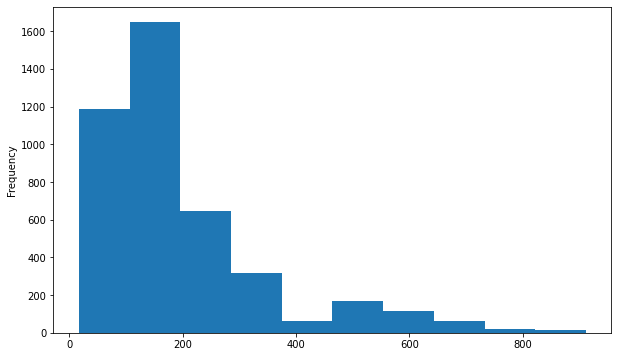

In [170]:
df['sales'].plot(kind = 'hist', figsize = (10,6) )


<AxesSubplot:>

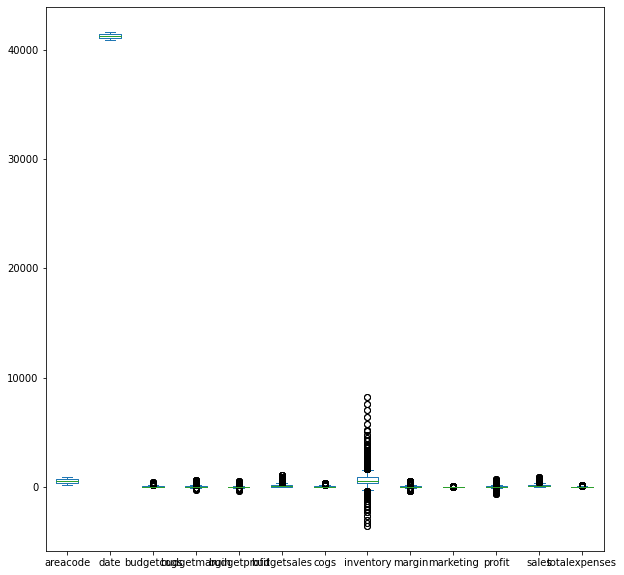

In [171]:
df.plot(kind = 'box', figsize = (10,10) )

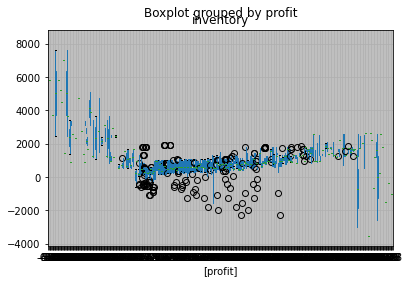

In [172]:
df.boxplot(column=['inventory'], by=['profit']);

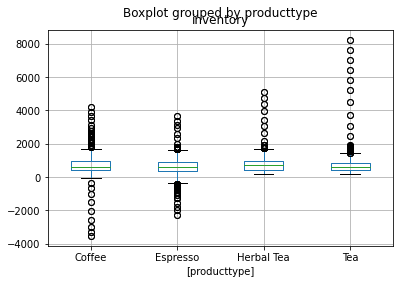

In [173]:
df.boxplot(column=['inventory'], by=['producttype']);

<AxesSubplot:ylabel='None'>

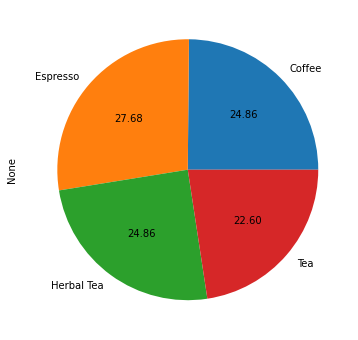

In [175]:
g = df.groupby('producttype').size()
g.plot(kind = 'pie', autopct='%.2f', figsize = (10,6) )

In [176]:
x=df['profit'].mean()
y=df['sales'].median()
print('Mean Capacity= ',x,'Median Capacity= ',y)

Mean Capacity=  61.097693032015066 Median Capacity=  138.0


In [177]:

#Variance
df['profit'].var()

10344.628315844528

In [178]:

#Standard Deviation
df['sales'].std()

151.1331271391155

In [179]:
#Stem-and-Leaf plot
#!pip install stemgraphic
import stemgraphic as STM

In [180]:
a = df.sample(15)

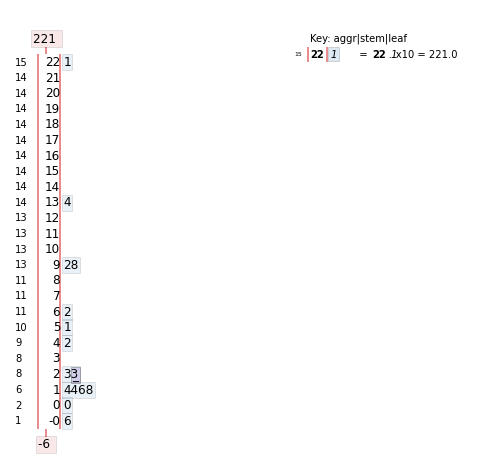

In [181]:

Fig, ax=STM.stem_graphic(a['profit'],scale=10)

In [182]:

L=1
U=6

X = np.arange(L, U+1)

print(X)

[1 2 3 4 5 6]


In [183]:

from scipy.stats import randint 
D_uni_dist = randint(L, U+1)
D_uni_pmf = D_uni_dist.pmf(X)

#print(D_uni_pmf)
D_uni_pmf[:5]
     

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667])

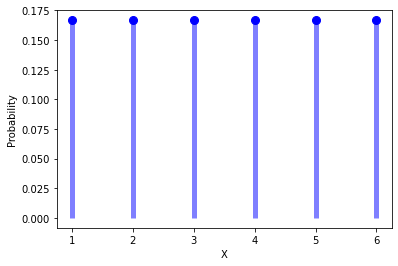

In [184]:
plt.plot(X, D_uni_pmf,'bo', ms=8)
plt.vlines(X, 0, D_uni_pmf, colors='b', lw=5, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()
     

In [185]:
#Finding mean and variance of normal distribution
from scipy.stats import norm
x = np.random.randn(20)
mu, sigma  = np.mean(x), np.std(x)
z_2= norm.ppf(0.85,mu,sigma)
z_2

0.9916935766615128

In [186]:
#Generating exponentially distributed data with lambda=20 and sample size=40
#In python scipy package default value of lambda=scale=1, so to transform, scale = 1/lambda
from scipy.stats import expon
x=expon.rvs(scale=1/20,size=40)
m, v, s = expon.mean(scale=1/20), expon.var(scale=1/20), expon.std(scale=1/20)
print('mean = ', m, 'Variance = ', v, 'Standard Deviation =', s)
     

mean =  0.05 Variance =  0.0025000000000000005 Standard Deviation = 0.05


Text(0.5, 1.0, 'OUR DATA')

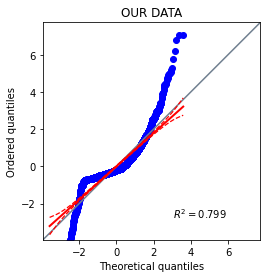

In [187]:
#lets test our data
#normality testing
#%pip install pingouin
import pingouin as pg
plt.show()            
pg.qqplot(df['profit']).set_title('OUR DATA')

In [188]:
print(stats.normaltest(df['profit']))

NormaltestResult(statistic=868.8702126189571, pvalue=2.124372078833051e-189)


Text(0.5, 1.0, 'OUR DATA')

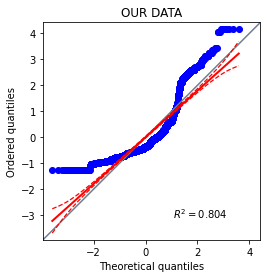

In [189]:
plt.show()            
pg.qqplot(df['cogs']).set_title('OUR DATA')

In [190]:
print(stats.normaltest(df['cogs']))

NormaltestResult(statistic=1247.3968740067958, pvalue=1.3527278697968197e-271)


In [191]:
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/Conf_interval.csv"
df = pd.read_csv(url)
df.head(2)

,Person,Life Expectancy,unemployment days,Gender
0,1,71.870059,1005.0,Male
1,2,63.751966,954.0,Male


In [192]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Person             47 non-null     int64  
 1   Life Expectancy    47 non-null     float64
 2   unemployment days  47 non-null     float64
 3   Gender             47 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ KB


In [193]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.lower()
df.columns

Index(['person', 'lifeexpectancy', 'unemploymentdays', 'gender'], dtype='object')

Text(0.5, 1.0, 'OUR DATA')

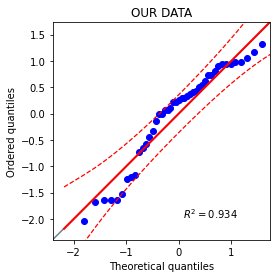

In [194]:
#lets test our data
plt.show()            
pg.qqplot(df['unemploymentdays']).set_title('OUR DATA')


In [195]:
print(stats.normaltest(df['unemploymentdays']))

NormaltestResult(statistic=4.495185321403004, pvalue=0.10565326191154607)


In [196]:
df= df.sample(15)
df.head()

,person,lifeexpectancy,unemploymentdays,gender
38,39,75.473568,1007.0,Male
42,43,67.395675,1006.0,Female
5,6,81.726367,1019.0,Female
12,13,58.082074,1019.0,Male
36,37,48.781831,990.0,Female


In [199]:
stats.ttest_1samp(df['unemploymentdays'],1000)

TtestResult(statistic=0.028128787124306817, pvalue=0.977956476897588, df=14)

In [ ]:
T,P = stats.ttest_1samp(df['unemploymentdays'],1000)
T,P

In [200]:
if P < 0.05:
  print("Reject Null Hypothesis i.e. actual mean is NOT 1000 days ")
else:
  print("Accept Null Hypothesis i.e. actual mean is 1000 days ")

Accept Null Hypothesis i.e. actual mean is 1000 days 


In [201]:
CI= stats.ttest_1samp(df['unemploymentdays'],1000).confidence_interval(confidence_level=0.95)
CI

ConfidenceInterval(low=984.9502369836341, high=1015.449763016366)